In [12]:
import tensorflow as tf

In [13]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [15]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.6057041 , -0.4875778 ,  0.56664926,  0.29658625, -0.15284663,
         0.5331689 , -0.4978687 , -0.2909589 , -0.39037913,  0.44428718]],
      dtype=float32)

In [16]:
tf.nn.softmax(predictions).numpy()

array([[0.15651517, 0.05245055, 0.15052031, 0.11489688, 0.07330304,
        0.14556426, 0.05191356, 0.06384701, 0.05780468, 0.13318458]],
      dtype=float32)

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2912 - accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1429 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1078 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0876 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0760 - accuracy: 0.9760


In [20]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0735 - accuracy: 0.9783 - 710ms/epoch - 2ms/step


[0.07350803166627884, 0.9782999753952026]

In [21]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0669 - accuracy: 0.9788
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0582 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0537 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0490 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0453 - accuracy: 0.9853


In [22]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0726 - accuracy: 0.9798 - 555ms/epoch - 2ms/step


[0.07256542146205902, 0.9797999858856201]

In [23]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [24]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.73842590e-09, 8.63230112e-11, 1.17095612e-06, 6.63449464e-06,
        5.46231484e-16, 1.05867999e-08, 7.83539291e-17, 9.99989629e-01,
        1.48208257e-09, 2.51165579e-06],
       [3.28194680e-08, 3.19222977e-07, 9.99998569e-01, 9.15040630e-07,
        2.99063825e-25, 3.30754233e-08, 8.75262529e-08, 1.52812235e-16,
        7.69385711e-09, 4.74001027e-17],
       [5.64811620e-09, 9.99845147e-01, 6.52688186e-06, 2.63914148e-06,
        1.23460256e-06, 3.02175749e-07, 3.45481823e-07, 1.25853403e-04,
        1.78333721e-05, 3.49137288e-08],
       [9.99983549e-01, 2.53995024e-12, 1.60250838e-05, 8.59743041e-11,
        1.63859745e-10, 1.62404268e-09, 4.80936137e-07, 1.98833172e-09,
        1.92752744e-10, 2.69156875e-08],
       [3.28799331e-07, 1.79580537e-12, 1.08911415e-07, 3.90469301e-09,
        9.63775754e-01, 2.00599306e-08, 4.66272141e-08, 5.29833269e-05,
        6.39284607e-08, 3.61707583e-02]], dtype=float32)>

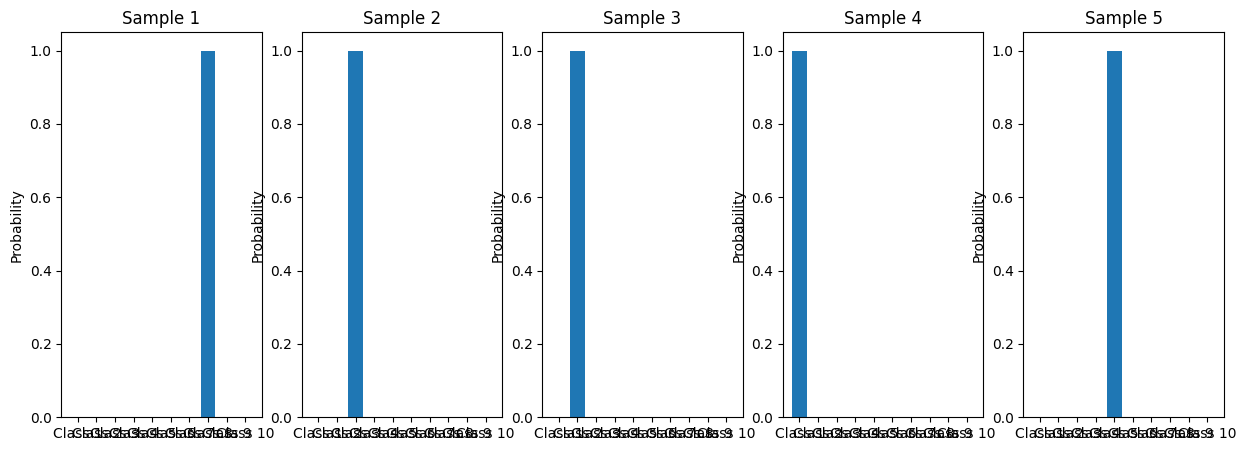

In [25]:
import matplotlib.pyplot as plt
import numpy as np

probabilities = np.array([
    [4.8721005e-10, 9.4778956e-11, 3.3823580e-06, 5.3966469e-05,
        2.8597231e-13, 1.7861192e-08, 5.2813583e-17, 9.9994254e-01,
        4.4544310e-09, 1.4461310e-07],
       [3.6467156e-09, 1.7976412e-05, 9.9998152e-01, 2.8875337e-07,
        2.1499023e-17, 5.4528826e-08, 5.6457412e-09, 8.7949834e-19,
        7.3676397e-08, 1.4538978e-17],
       [5.6662984e-08, 9.9982566e-01, 2.4865561e-05, 1.5888808e-06,
        6.7237970e-06, 2.1899521e-07, 6.4514323e-05, 2.2253367e-05,
        5.4130087e-05, 3.9806585e-09],
       [9.9999845e-01, 1.8935012e-12, 7.8084497e-08, 1.8271294e-10,
        3.3821290e-09, 8.9378389e-09, 1.4164926e-06, 4.1326715e-09,
        2.2044827e-12, 4.4407358e-08],
       [4.1378595e-07, 7.3491192e-11, 2.5162272e-08, 8.7435059e-11,
        9.9998188e-01, 1.7232058e-08, 3.9752140e-07, 9.6250842e-06,
        7.5412454e-10, 7.6719862e-06]
])

# Number of classes
num_classes = probabilities.shape[1]

# Number of samples
num_samples = probabilities.shape[0]

# Create subplots
fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))

# Loop over each sample
for i in range(num_samples):
    axs[i].bar(range(num_classes), probabilities[i])
    axs[i].set_title(f"Sample {i+1}")
    axs[i].set_xticks(range(num_classes))
    axs[i].set_xticklabels([f"Class {j+1}" for j in range(num_classes)])
    axs[i].set_ylabel('Probability')

plt.show()
